# 1. Local features
- Extract & calculate local features
- Match features between two images

In [3]:
import cv2
import numpy as np

## Load images
imgs = [cv2.imread('data/image{}.png'.format(i+1)) for i in range(2)]

In [15]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeBrief
from helper import corner_detection

def matchPics(I1, I2):
    """
    Match images

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Detect Features in Both Images
    loc1 = corner_detection(I1_gray)
    loc2 = corner_detection(I2_gray)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, loc1)
    desc2, locs2 = computeBrief(I2_gray, loc2)


    #Match features using the descriptors
    matches = featMatch(desc1, desc2)

    return matches, locs1, locs2

In [16]:
from helper import plotMatches

img1 = cv2.imread('data/image1.png')
img2 = cv2.imread('data/image2.png')

matches, locs1, locs2 = matchPics(img1, img2)
plotMatches(img1, img2, matches, locs1, locs2, color='y')

KeyboardInterrupt: 

### BRIEF and Rotations

  0%|          | 0/36 [00:00<?, ?it/s]

Text(0.5, 1.0, 'BRIEF and Rotations')

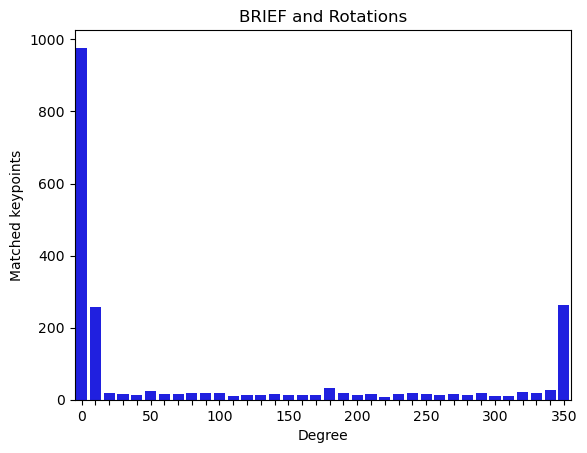

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import trange

cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36)

for i in trange(36):
    # Rotate Image
    cv_rotated = cv_cover.rotate(10 * i, expand=True)

    # Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))

    # Update histogram
    match_hist[i] = len(matches)


#Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='b')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('BRIEF and Rotations')

/home/kyungmin/kim_ws/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


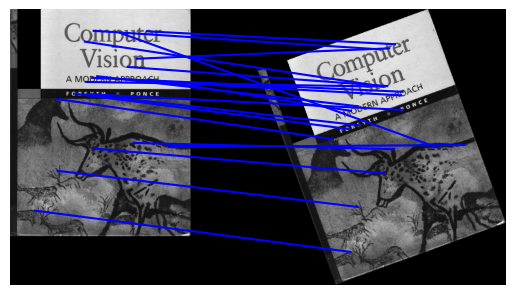

In [7]:
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

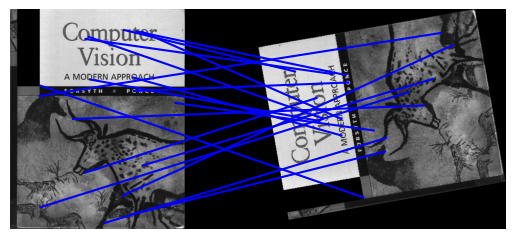

In [8]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

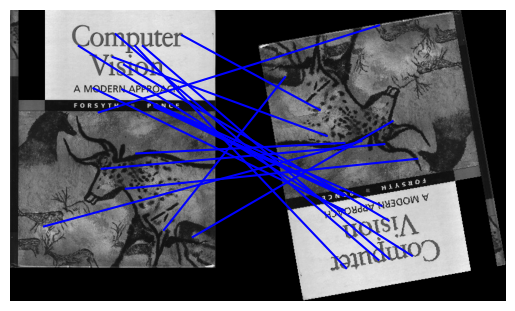

In [9]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

### A simple remedy: use ORB feature

In [11]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeORB
from PIL import Image
from tqdm.auto import trange
import seaborn as sns
import matplotlib.pyplot as plt

def matchPicsORB(I1, I2):
    """
    Match images with ORB

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeORB(I1_gray)
    desc2, locs2 = computeORB(I2_gray)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2, None)

    return matches, locs1, locs2


  0%|          | 0/36 [00:00<?, ?it/s]

Text(0.5, 1.0, 'ORB and Rotations')

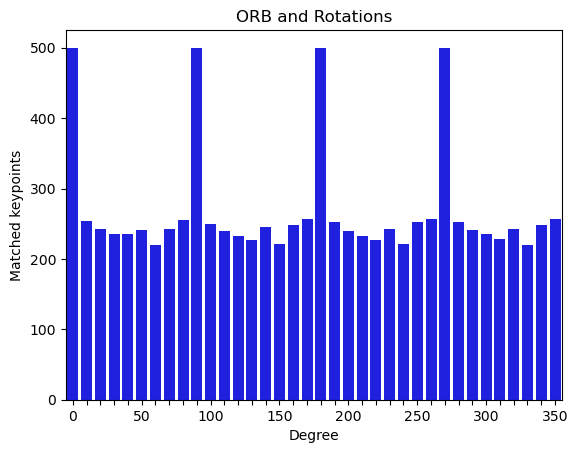

In [12]:
cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36)

for i in trange(36):
    # [TODO] Rotate Image
    cv_rotated = cv_cover.rotate(10 * i, expand=True)

    # [TODO] Compute features, descriptors, and Match features
    matches, locs1, locs2 = matchPicsORB(np.asarray(cv_cover), np.asarray(cv_rotated))

    # [TODO] Update histogram
    match_hist[i] = len(matches)


# Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='b')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('ORB and Rotations')

/home/kyungmin/kim_ws/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


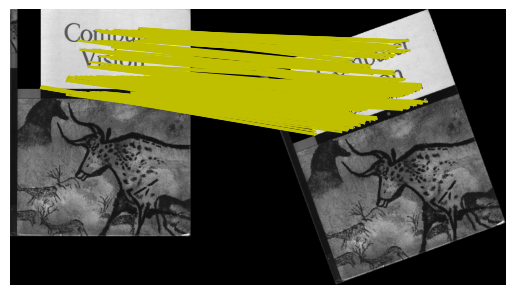

In [17]:
from helper import plotMatches
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='y')

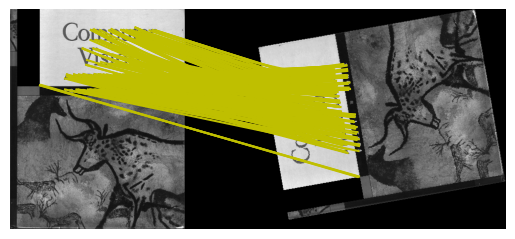

In [18]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='y')

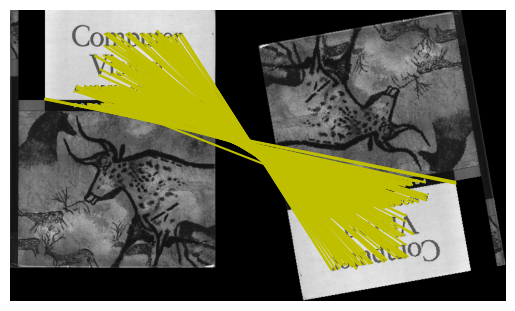

In [19]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='y')

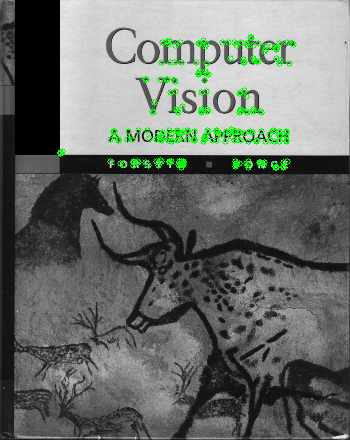

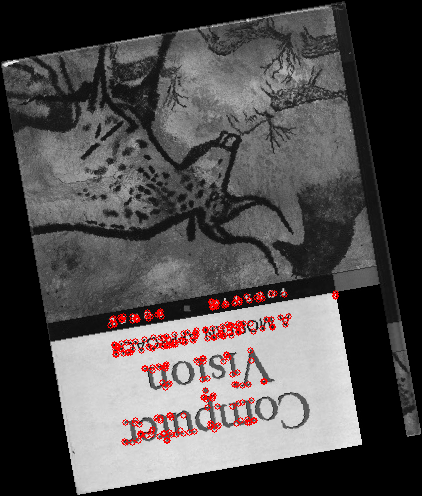

In [20]:
# Double-check the location of matched points
I1 = np.array(cv_cover)
I2 = np.array(cv_rotated)

for cy, cx in locs1[matches[:,0]]:
    cv2.circle(I1, (int(cx), int(cy)), radius=3, color=(0,255,0))

for cy, cx in locs2[matches[:,1]]:
    cv2.circle(I2, (int(cx), int(cy)), radius=3, color=(255,0,0))

display(Image.fromarray(I1))
display(Image.fromarray(I2))